In [15]:
import numpy as np # thư viện tính toán toán học
import matplotlib.pyplot as plt # visualize data sử dụng đồ thị
from scipy.spatial.distance import cdist # Hỗ trợ tính khoảng cách

In [16]:
X = np.array([[3, 12], [6, 9], [4.5, 12], [12, 3], [15, 6], [12, 5], [9, 18], [9, 12]])
X.shape

(8, 2)

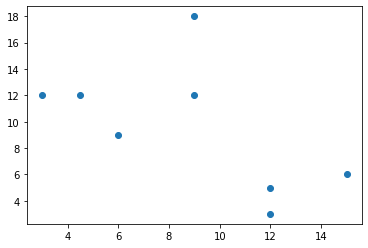

In [17]:
plt.scatter(X[:,0], X[:,1])

In [18]:
def kmeans_init_centers(X, n_cluster):
    # random k index beetween 0 and shape(X) without duplicate index.
    # Then return X[index] as cluster
    return X[np.random.choice(X.shape[0], n_cluster, replace=False)]

In [19]:
def kmeans_predict_labels(X, centers):
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

In [20]:
def kmeans_update_centers(X, labels, n_cluster):
    centers = np.zeros((n_cluster, X.shape[1]))
    for k in range(n_cluster):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

In [21]:
def kmeans_has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

In [22]:
# Hàm này dùng để vẽ dữ liệu lên đồ thị
# Random color chỉ làm việc với k <= 4
# Nếu bạn thay đổi k > 4, hãy sửa lại phần random color nhé
# Chỉ sử dụng trong bài toán này thôi nhé.
def kmeans_visualize(X, centers, labels, n_cluster, title):
    plt.xlabel('x') # label trục x
    plt.ylabel('y') # label trục y
    plt.title(title) # title của đồ thị
    plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'] # danh sách các màu hỗ trợ

    for i in range(n_cluster):
        data = X[labels == i] # lấy dữ liệu của cụm i
        plt.plot(data[:, 0], data[:, 1], plt_colors[i] + '^', markersize = 4, label = 'cluster_' + str(i)) # Vẽ cụm i lên đồ thị
        plt.plot(centers[i][0], centers[i][1],  plt_colors[i+4] + 'o', markersize = 10, label = 'center_' + str(i)) # Vẽ tâm cụm i lên đồ thị
    plt.legend() # Hiện bảng chú thích
    plt.show()

In [23]:
def kmeans(init_centes, init_labels, X, n_cluster):
    centers = init_centes
    labels = init_labels
    times = 0
    while True:
        labels = kmeans_predict_labels(X, centers)
        kmeans_visualize(X, centers, labels, n_cluster, 'Assigned label for data at time = ' + str(times + 1))
        new_centers = kmeans_update_centers(X, labels, n_cluster)
        if kmeans_has_converged(centers, new_centers):
            break
        centers = new_centers
        kmeans_visualize(X, centers, labels, n_cluster, 'Update center possition at time = ' + str(times + 1))
        times += 1
    return (centers, labels, times)

[[ 9. 12.]
 [ 9. 18.]
 [15.  6.]]


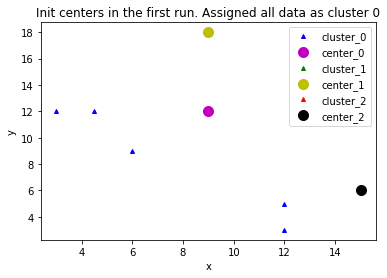

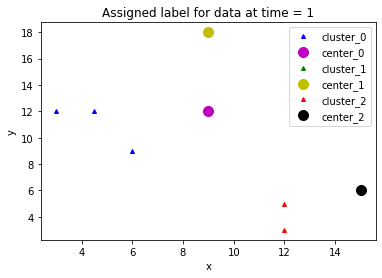

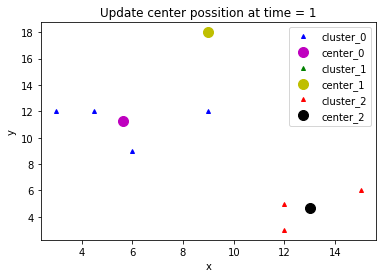

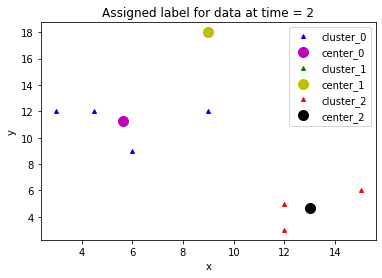

Center [[ 5.625      11.25      ]
 [ 9.         18.        ]
 [13.          4.66666667]]
Done! Kmeans has converged after 1 times


In [25]:
n_cluster = 3
init_centers = kmeans_init_centers(X, n_cluster)
print(init_centers) # In ra tọa độ khởi tạo ban đầu của các tâm cụm
init_labels = np.zeros(X.shape[0])
kmeans_visualize(X, init_centers, init_labels, n_cluster, 'Init centers in the first run. Assigned all data as cluster 0')
centers, labels, times = kmeans(init_centers, init_labels, X, n_cluster)
print('Center', centers)
print('Done! Kmeans has converged after', times, 'times')